In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [60]:
df_orig = pd.read_csv('datasets/store_sales.csv')
df_orig.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df = df_orig.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# => Sales on a perticular month

In [24]:
df['Month'] = df['Order Date'].str[3:5]
months = [month for month in df['Month'].unique()]
months.sort()
months

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [31]:
results_sales_month = df.groupby('Month').sum()
results_sales_month.head()

,Row ID,Postal Code,Sales
Month,,,
01,1814172,20368942.0,94291.6296
02,1571571,16533469.0,59371.1154
03,3517923,37422279.0,197573.5872
04,3009570,34466774.0,136283.0006
05,3774346,39303261.0,154086.7237


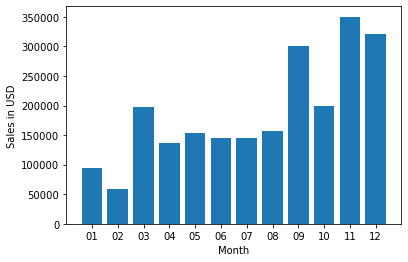

In [36]:
plt.bar(months, results_sales_month['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

# => Sales in different cities

In [55]:
state = [state for state in df['State'].unique()]
results_sales_state = df.groupby('State').sum()
results_sales_state.head()

,Row ID,Postal Code,Sales
State,,,
Alabama,243876,2195669.0,19510.6400
Arizona,1009916,19016902.0,35272.6570
Arkansas,304575,4339309.0,11678.1300
California,9592568,179328411.0,446306.4635
Colorado,767296,14373747.0,31841.5980


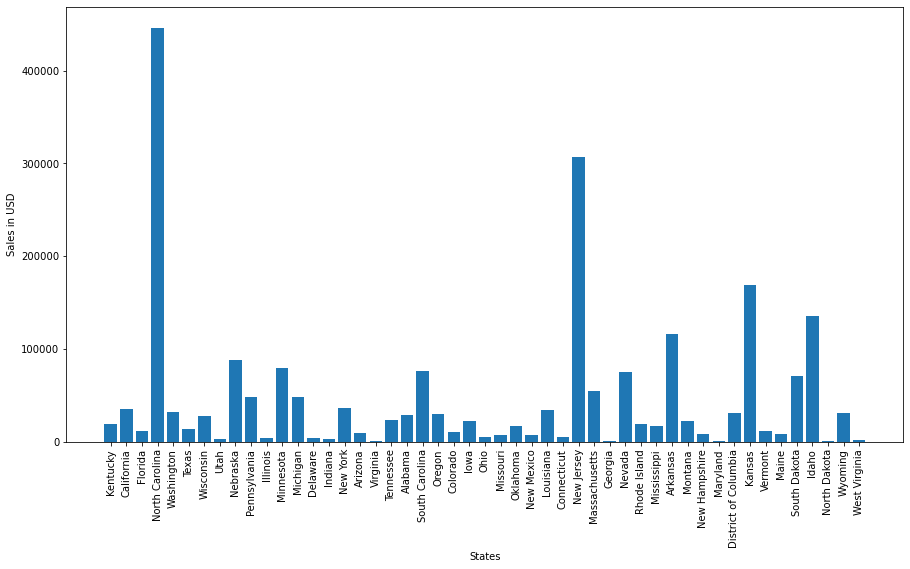

In [58]:
plt.figure(figsize=(15,8))
plt.bar(state, results_sales_state['Sales'])
plt.xticks(rotation='vertical')
plt.xlabel('States')
plt.ylabel('Sales in USD')
plt.show()

# => what catagory of product was sold the most 

In [68]:
results_sales_subcat = df.groupby('Sub-Category').sum()
sub_cat = [cat for cat in df['Sub-Category'].unique()]
print(sub_cat)
df_temp.head()

['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper', 'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines', 'Copiers']


,Row ID,Postal Code,Sales
Sub-Category,,,
Accessories,3739802,43399162.0,164186.7000
Appliances,2338368,24885925.0,104618.4030
Art,3811363,42715603.0,26705.4100
Binders,7327254,82120128.0,200028.7850
Bookcases,1136640,12596686.0,113813.1987


In [83]:
results_sales_cat = df.groupby('Category').sum()
catagory = [cata for cata in df['Category'].unique()]
catagory

['Furniture', 'Office Supplies', 'Technology']

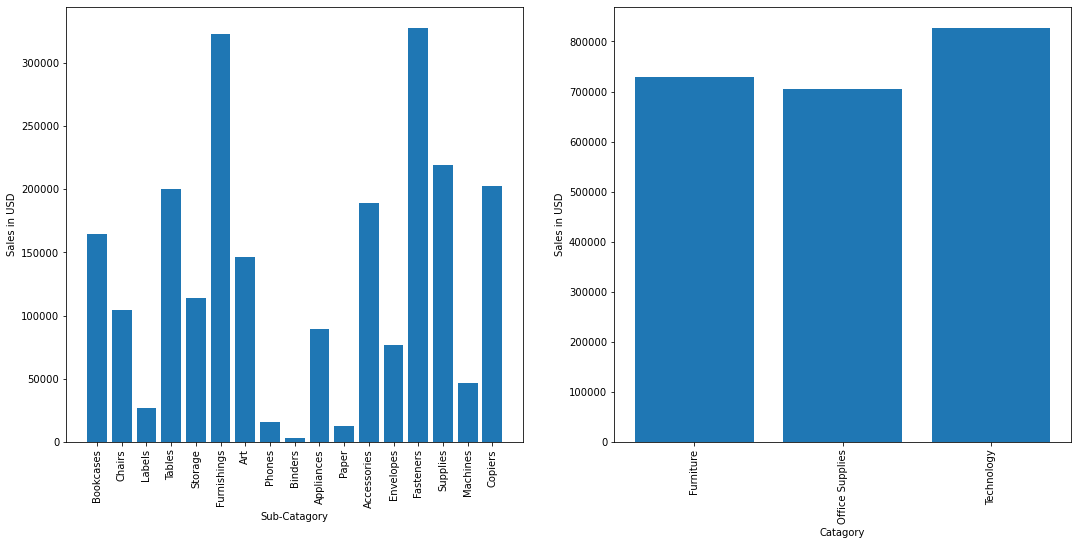

In [86]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.bar(sub_cat, results_sales_subcat['Sales'])
plt.xticks(rotation='vertical')
plt.xlabel('Sub-Catagory')
plt.ylabel('Sales in USD')

plt.subplot(1,2,2)
plt.bar(catagory, results_sales_cat['Sales'])
plt.xticks(rotation='vertical')
plt.xlabel('Catagory', )
plt.ylabel('Sales in USD')
plt.show()

In [87]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)